In [18]:
%matplotlib inline

from collections import defaultdict
import scipy
import traceback
import os
import numpy as np
import scipy
import scipy.stats
import scipy.io
import matplotlib.pyplot as plt
import sys
import seaborn as sns; sns.set()  # for plot styling

import sklearn.cluster
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#LOAD DATA
input_path = 'filtered_gene_bc_matrices/zv10_gtf89_cloche_gfp/'

if os.path.isfile(input_path + '/matrix.npz'):
    E = scipy.sparse.load_npz(input_path + '/matrix.npz')
else:
    E = scipy.io.mmread(input_path + '/matrix.mtx').T.tocsc()
    scipy.sparse.save_npz(input_path + '/matrix.npz', E, compressed=True)

print(E.shape)


(1640, 25260)


In [19]:
# Convert to numpy array and standardize
X = E.toarray()
X = StandardScaler().fit_transform(X)


C:\Users\Sanjit Dasgupta\Anaconda3.0\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


original shape:    (1640, 25260)
transformed shape: (1640, 20)


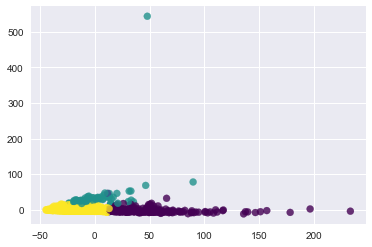

In [20]:
# KM 5 before PCA 20
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
pca = PCA(n_components=20)
pca.fit(X)
X_pca = pca.transform(X)

print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8,c=y_kmeans, cmap='viridis')

original shape:    (1640, 25260)
transformed shape: (1640, 20)
2.426243487961318e-16
PCA 20 PC0 PC1


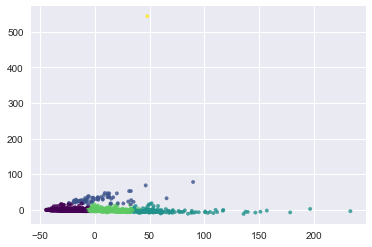

In [135]:
# PCA 20 PC0 PC1
pca = PCA(n_components=20)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_pca)
y_kmeans = kmeans.predict(X_pca)
print(np.mean(X_pca[:, 0]))
#X1 = np.tan(X_pca[:, 0])/np.mean(X_pca[:, 0])
#X2 = np.tan(X_pca[:, 1])/np.mean(X_pca[:, 1])
print("PCA 20 PC0 PC1")
plt.scatter(X_pca[:, 0], X_pca[:, 1],marker='.', alpha=0.8,c=y_kmeans, cmap='viridis')
#plt.scatter(X1, X2, alpha=0.8,c=y_kmeans, cmap='viridis')


In [80]:
print(pca.components_[0].argmax())

p1 = np.fabs(pca.components_[0])
ind = np.argpartition(p1,-10)[-10:]
ind

24346


array([19623, 14764, 14522,  1954, 24346, 20169, 23637,  4917, 17529,
        5097], dtype=int64)

PCA 20 PC1 PC2


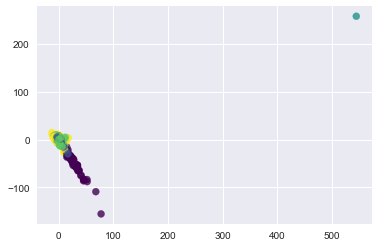

In [22]:
print("PCA 20 PC1 PC2")
plt.scatter(X_pca[:, 1], X_pca[:, 2], alpha=0.8,c=y_kmeans, cmap='viridis')


PCA 20 PC0 PC2


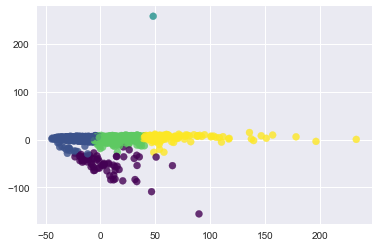

In [23]:
plt.scatter(X_pca[:, 0], X_pca[:, 2], alpha=0.8,c=y_kmeans, cmap='viridis')
print("PCA 20 PC0 PC2")

original shape:    (1640, 25260)
transformed shape: (1640, 50)
PCA 50 PC0 PC1


Text(0.5,1,'PCA50')

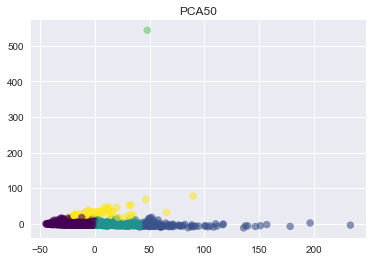

In [24]:
#PCA 50
pca2 = PCA(n_components=50)
pca2.fit(X)
X_pca2 = pca2.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca2.shape)

kmeans2 = KMeans(n_clusters=5)
kmeans2.fit(X_pca2)
y_kmeans2 = kmeans2.predict(X_pca2)
print("PCA 50 PC0 PC1")
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], alpha=0.6,c=y_kmeans2, cmap='viridis')
plt.title('PCA50')

PCA 50 PC1 PC2


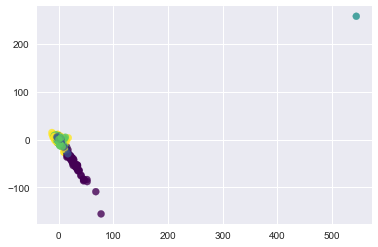

In [25]:
print("PCA 50 PC1 PC2")
plt.scatter(X_pca2[:, 1], X_pca2[:, 2], alpha=0.8,c=y_kmeans, cmap='viridis')

PCA 50 PC0 PC2


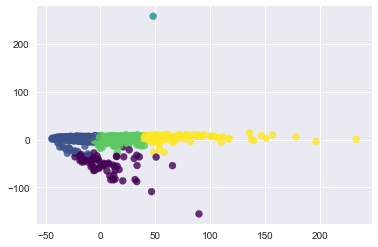

In [26]:
print("PCA 50 PC0 PC2")
plt.scatter(X_pca2[:, 0], X_pca2[:, 2], alpha=0.8,c=y_kmeans, cmap='viridis')

original shape:    (1640, 25260)
transformed shape: (1640, 2)


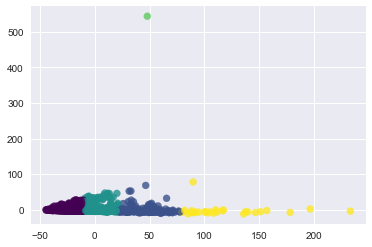

In [27]:
# PCA 2 components
pca3 = PCA(n_components=2)
pca3.fit(X)
X_pca3 = pca3.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca3.shape)

kmeans3 = KMeans(n_clusters=5)
kmeans3.fit(X_pca3)
y_kmeans3 = kmeans3.predict(X_pca3)

plt.scatter(X_pca3[:, 0], X_pca3[:, 1], alpha=0.8,c=y_kmeans3, cmap='viridis')

In [28]:

from sklearn.manifold import TSNE

print(X_pca.shape)
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X_pca)


(1640, 20)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1640 samples in 0.002s...
[t-SNE] Computed neighbors for 1640 samples in 0.144s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1640
[t-SNE] Computed conditional probabilities for sample 1640 / 1640
[t-SNE] Mean sigma: 6.493128
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.644058
[t-SNE] Error after 300 iterations: 1.085316


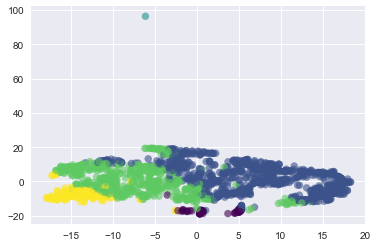

In [29]:
plt.scatter(tsne_results[:,0], tsne_results[:,1], alpha=0.6,c=y_kmeans, cmap='viridis')

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1640 samples in 0.002s...
[t-SNE] Computed neighbors for 1640 samples in 0.139s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1640
[t-SNE] Computed conditional probabilities for sample 1640 / 1640
[t-SNE] Mean sigma: 6.946390
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.950432
[t-SNE] Error after 300 iterations: 0.977641


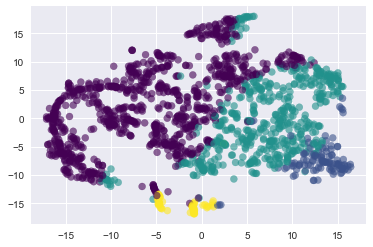

In [30]:
tsneP1 = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=300)
tsne_resultsP1 = tsneP1.fit_transform(X_pca)
plt.scatter(tsne_resultsP1[:,0], tsne_resultsP1[:,1], alpha=0.6,c=y_kmeans2, cmap='viridis')

In [31]:
tsne2 = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results2 = tsne.fit_transform(X_pca2)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1640 samples in 0.004s...
[t-SNE] Computed neighbors for 1640 samples in 0.276s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1640
[t-SNE] Computed conditional probabilities for sample 1640 / 1640
[t-SNE] Mean sigma: 6.709885
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.552467
[t-SNE] Error after 300 iterations: 1.211594


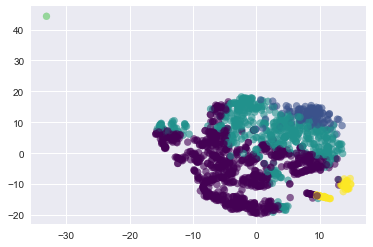

In [32]:
plt.scatter(tsne_results2[:,0], tsne_results2[:,1], alpha=0.6,c=y_kmeans2, cmap='viridis')

In [33]:
tsne3 = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results3 = tsne.fit_transform(X_pca3)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1640 samples in 0.001s...
[t-SNE] Computed neighbors for 1640 samples in 0.059s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1640
[t-SNE] Computed conditional probabilities for sample 1640 / 1640
[t-SNE] Mean sigma: 1.273212
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.996086
[t-SNE] Error after 300 iterations: 0.577918


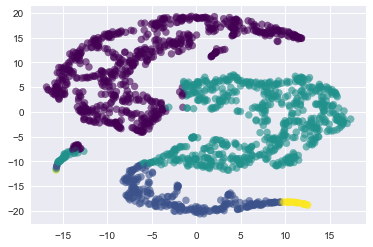

In [34]:
plt.scatter(tsne_results3[:,0], tsne_results3[:,1], alpha=0.6,c=y_kmeans3, cmap='viridis')